In [15]:
import matplotlib.pyplot as plt
import random

In [16]:
y_true2 = [random.randint(0, 10),random.randint(0, 10),random.randint(0, 10),random.randint(0, 10),
          random.randint(0, 10),random.randint(0, 10),random.randint(0, 5)]
y_pred2 = [random.randint(0, 10),random.randint(0, 10),random.randint(0, 10),random.randint(0, 10),
          random.randint(0, 10),random.randint(0, 10),random.randint(0, 5)]

In [17]:
def custom_loss2(y_true2, y_pred2):
    campvec = []
    # constantes
    a1 = y_true2[0]

    a2 =y_true2[1]
    
    b1 = y_true2[2]
    
    b2 = y_true2[3]

    d1 = y_true2[4]

    d2 = y_true2[5]

    n = y_true2[5]
    def f(t, y):

        # asignar a cada ODE a un elemento de vector
        X = y[0]
        Y = y[1]

        # definimos cada ODE
        dX_dt = a1/(1+Y**n)-d1*X+b1
        dY_dt = a2/(1+X**n)-d2*Y+b1

        return [dX_dt, dY_dt]

    x_range_neg = 0
    x_range_pos = 5
    y_range_neg = 0
    y_range_pos =5

    y1 = np.linspace(x_range_neg, x_range_pos, 100)
    y2 = np.linspace(y_range_neg, y_range_pos, 100)

    Y1, Y2 = np.meshgrid(y1, y2)
    
    t1 = 0

    u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

    NI, NJ = Y1.shape

    u1, v1 = f(t1, [Y1, Y2])
    u, v = f(t1, [Y1, Y2])
    M = (np.hypot(u, v))
    u /= M
    v /= M
# ----------------------------------------------------------------------------
    campvec2 = []
    # constantes
    a12 = y_pred2[0]

    a22 =y_pred2[1]
    
    b12 = y_pred2[2]
    
    b22 = y_pred2[3]

    d12 = y_pred2[4]

    d22 = y_pred2[5]

    n2 = y_pred2[5]
    def f2(t2, ye2):

        # asignar a cada ODE a un elemento de vector
        X2 = ye2[0]
        Y2 = ye2[1]

        # definimos cada ODE
        dX2_dt = a12/(1+Y2**n2)-d12*X2+b12
        dY2_dt = a22/(1+X2**n2)-d22*Y2+b12
        return [dX2_dt, dY2_dt]

    y12 = np.linspace(x_range_neg, x_range_pos, 100)
    y22 = np.linspace(y_range_neg, y_range_pos, 100)
    Y12, Y22 = np.meshgrid(y12, y22)
    u2, v2 = np.zeros(Y12.shape), np.zeros(Y22.shape)
    u2, v2 = f2(t1, [Y12, Y22])
    M2 = np.sqrt(np.square(u2) + np.square(v2))
    u2 /= M2
    v2 /= M2
    campvecx = u- u2
    campvecy = v - v2    
    
    
    #loss = tf.reduce_mean(campvectotal)
    return u,v, u2,v2, campvecx, campvecy,Y1,Y2,Y12,Y22,M,M2

In [18]:
u,v,u2,v2,campvecx,campvecy,Y1,Y2,Y12,Y22,M,M2 = custom_loss2(y_true2,y_pred2)
print(u)

[[ 0.70710678  0.69375606  0.67964991 ... -0.97052757 -0.97131944
  -0.97208025]
 [ 0.71691265  0.70374447  0.68980894 ... -0.97292353 -0.97365364
  -0.97435498]
 [ 0.72684641  0.71387923  0.70013384 ... -0.97523015 -0.97590037
  -0.97654406]
 ...
 [ 0.35568801  0.33756084  0.31905014 ... -0.8209115  -0.82422906
  -0.82746386]
 [ 0.35063632  0.33269907  0.31439327 ... -0.81728872 -0.82065211
  -0.82393233]
 [ 0.34571649  0.32796702  0.30986326 ... -0.81366574 -0.81707419
  -0.82039907]]


Text(0, 0.5, 'Concentración Y')

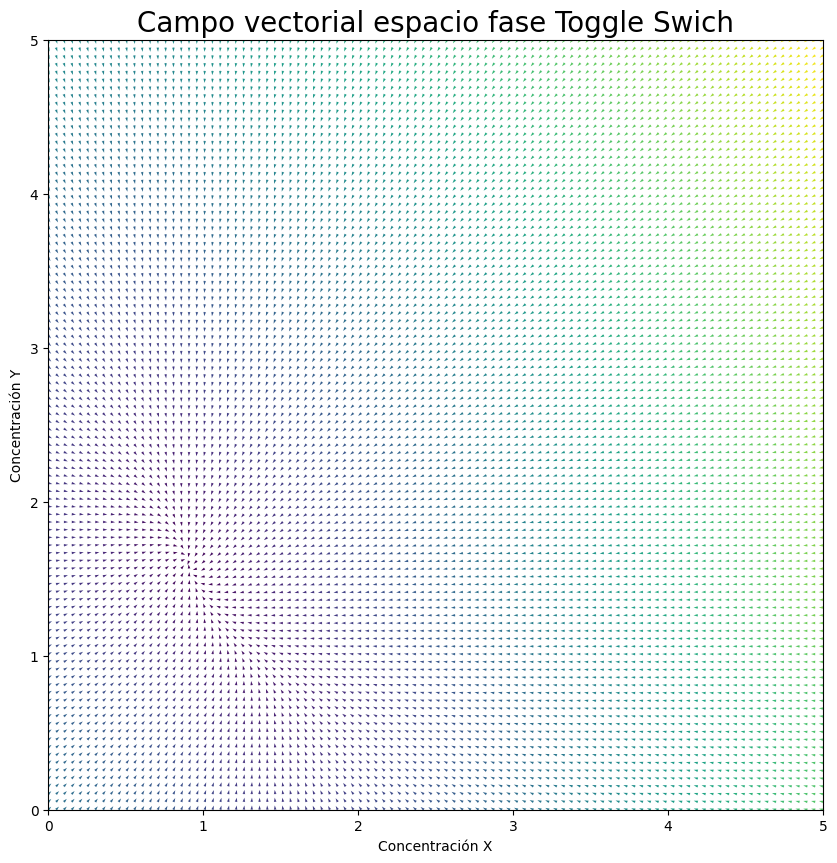

In [19]:
x_range_neg = 0
x_range_pos = 5
y_range_neg = 0
y_range_pos =5
plt.figure(figsize=(10, 10))
Q = plt.quiver(Y1, Y2, u, v, M, angles='xy')
plt.title('Campo vectorial espacio fase Toggle Swich', fontsize=20)
plt.xlim([x_range_neg, x_range_pos])
plt.ylim([y_range_neg, y_range_pos])
plt.xlabel('Concentración X')
plt.ylabel('Concentración Y')

Text(0, 0.5, 'Concentración Y')

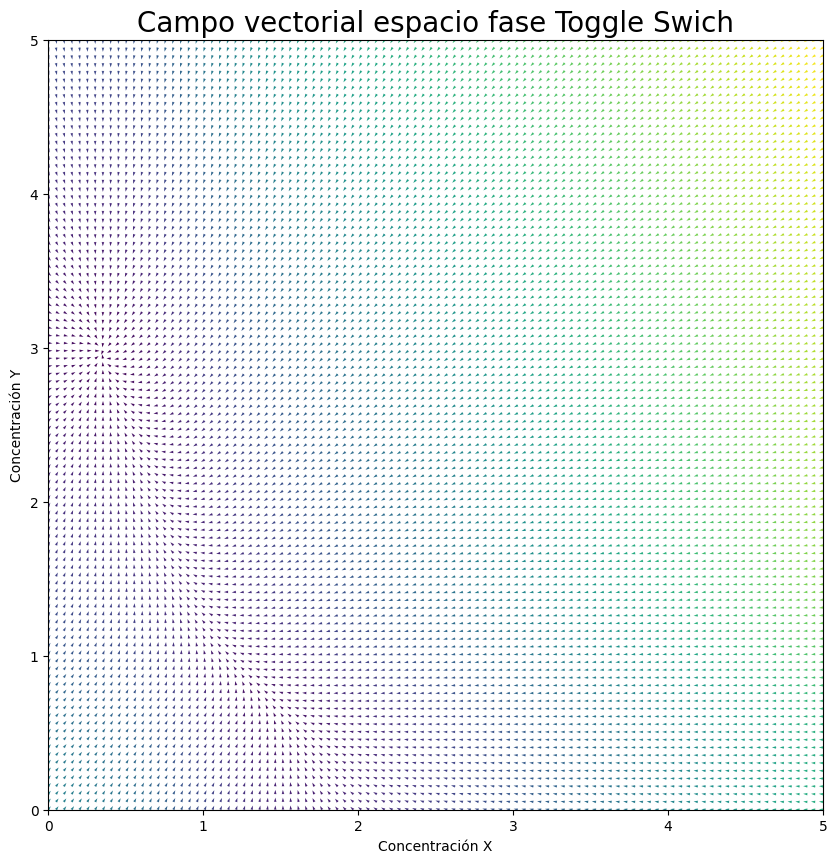

In [20]:
x_range_neg = 0
x_range_pos = 5
y_range_neg = 0
y_range_pos =5
plt.figure(figsize=(10, 10))
Q = plt.quiver(Y12, Y22, u2, v2, M2, angles='xy')
plt.title('Campo vectorial espacio fase Toggle Swich', fontsize=20)
plt.xlim([x_range_neg, x_range_pos])
plt.ylim([y_range_neg, y_range_pos])
plt.xlabel('Concentración X')
plt.ylabel('Concentración Y')

Text(0, 0.5, 'Concentración Y')

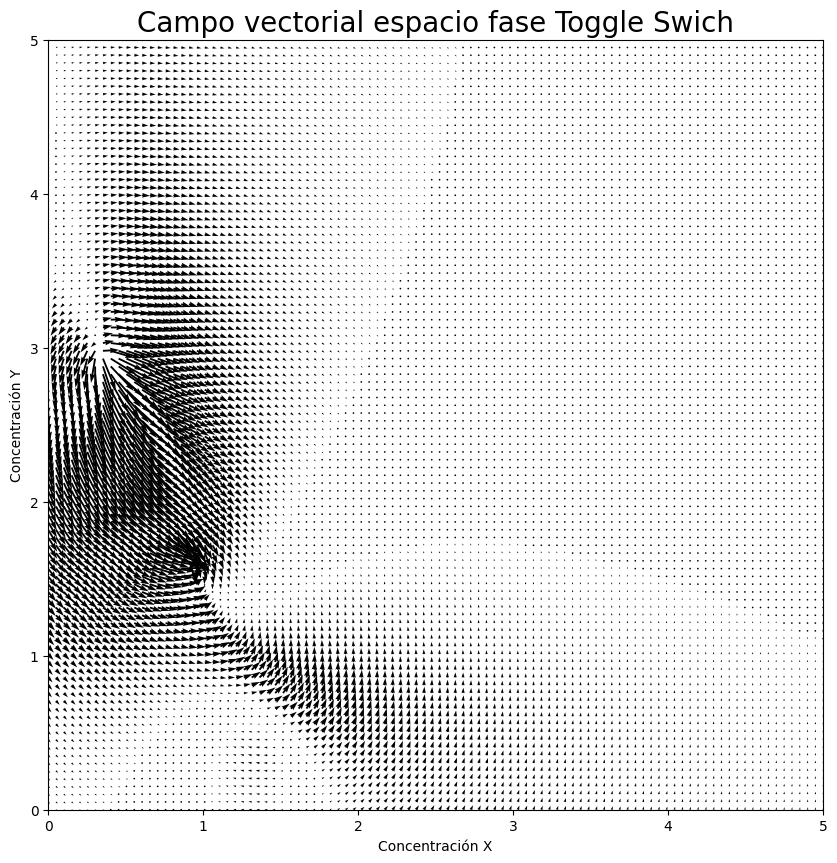

In [21]:
x_range_neg = 0
x_range_pos = 5
y_range_neg = 0
y_range_pos =5
plt.figure(figsize=(10, 10))
Q = plt.quiver(Y12, Y22, campvecx, campvecy, angles='xy')
plt.title('Campo vectorial espacio fase Toggle Swich', fontsize=20)
plt.xlim([x_range_neg, x_range_pos])
plt.ylim([y_range_neg, y_range_pos])
plt.xlabel('Concentración X')
plt.ylabel('Concentración Y')